Assignment on Classification
Do the following in the iris dataset
1. Read the dataset to python environment
2. Do the necessary pre-processing steps
3. Find out which classification model gives the best result (try all the
classification algorithms discussed in the session)

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Loading the data
iris_data=pd.read_excel('/content/iris.xls')
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Understanding the data


In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


There is missing values in SL,SW,PL. Four nuemeric columns and one object type data


In [4]:
# Find the missing values from each column of this dataset
iris_data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

array([[<Axes: title={'center': 'SL'}>, <Axes: title={'center': 'SW'}>],
       [<Axes: title={'center': 'PL'}>, <Axes: title={'center': 'PW'}>]],
      dtype=object)

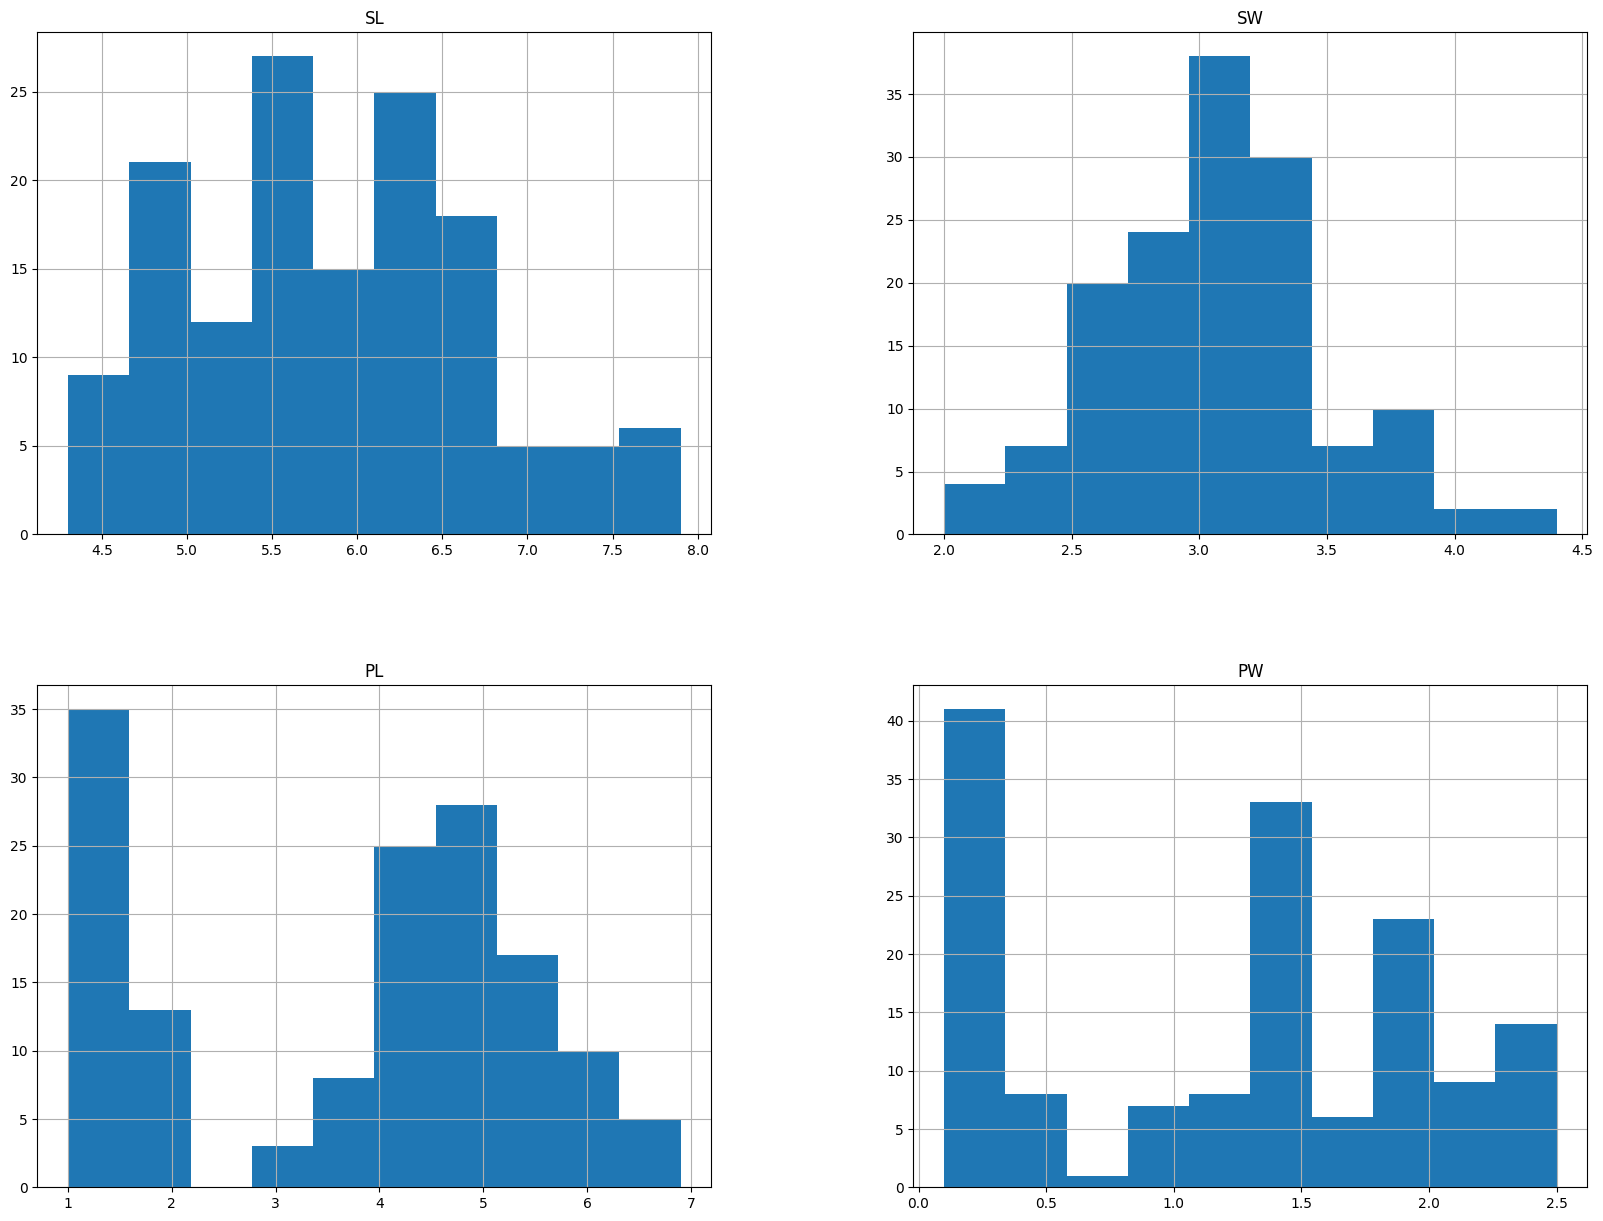

In [5]:
freq_graph=iris_data.select_dtypes(include='float64')
freq_graph.hist(figsize=(20,15))

In [6]:
# filling the missing value using mean, median
iris_data['SL']=iris_data['SL'].fillna(iris_data['SL'].mean())
iris_data['SW']=iris_data['SW'].fillna(iris_data['SW'].mean())
iris_data['PL']=iris_data['PL'].fillna(iris_data['PL'].median())

In [7]:
iris_data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

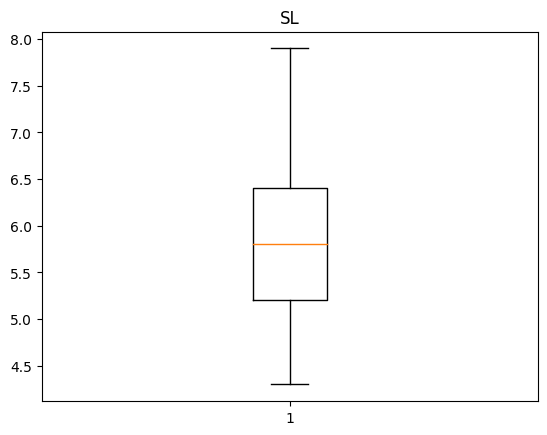

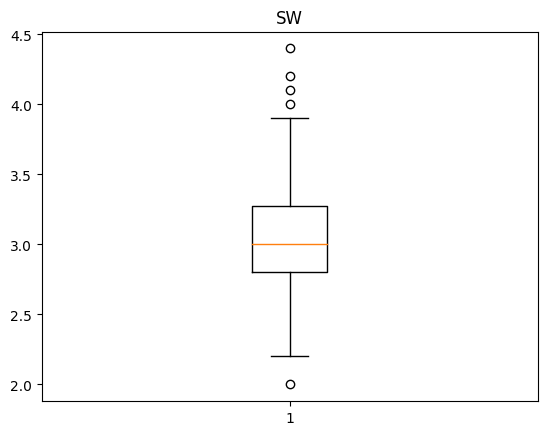

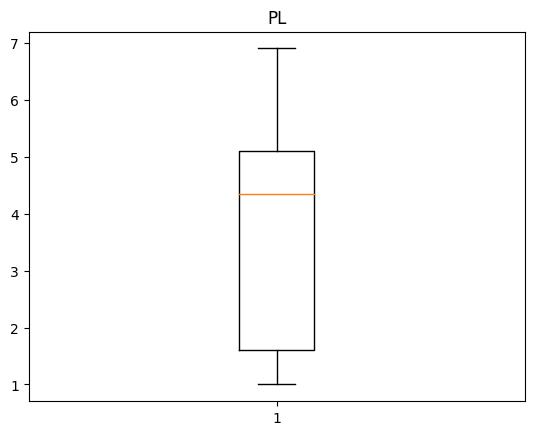

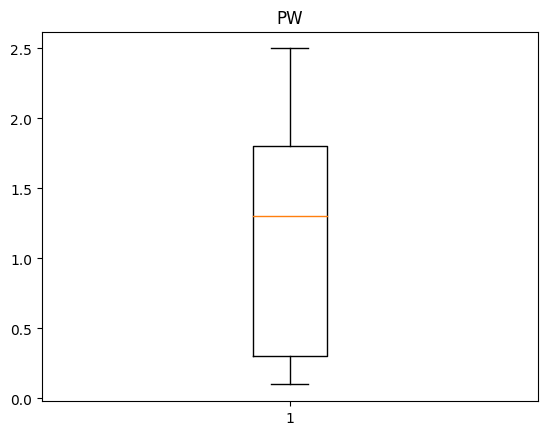

In [8]:
# Checking Outliers
num_columns=['SL','SW', 'PL','PW']


for i in num_columns:
  plt.figure()
  plt.boxplot(iris_data[i])
  plt.title(i);

In [9]:
# Handling outlier using IQR method
Q1 = iris_data['SW'].quantile(0.25)
Q3 = iris_data['SW'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper limit for outliers
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

# Clip outliers to the lower and upper limit
iris_data['SW'] = iris_data['SW'].clip(lower=lower_lim, upper=upper_lim)



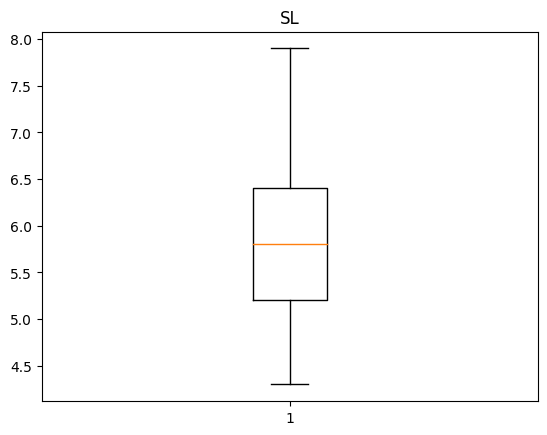

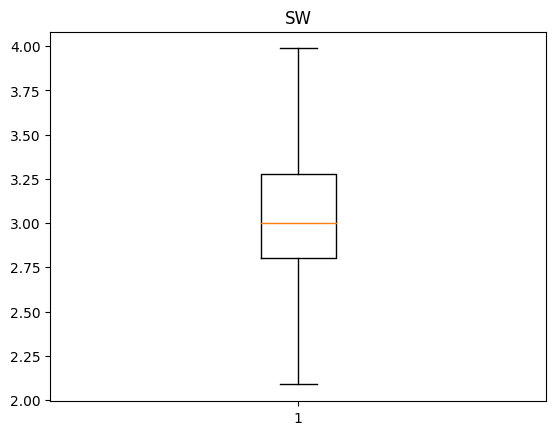

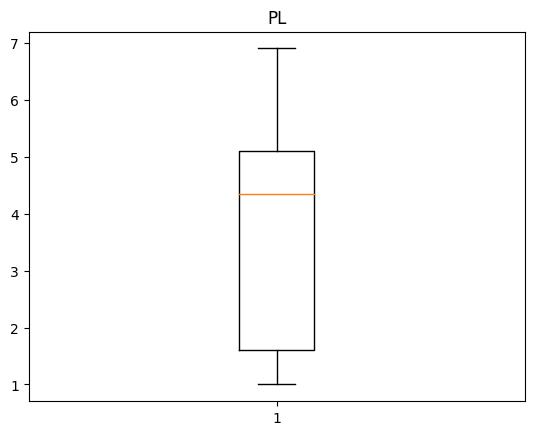

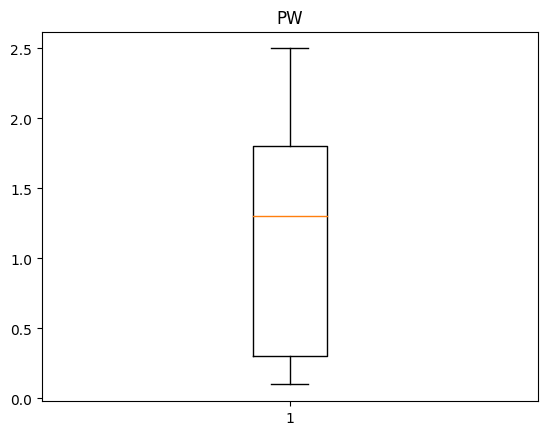

In [10]:
num_columns=['SL','SW', 'PL','PW']


for i in num_columns:
  plt.figure()
  plt.boxplot(iris_data[i])
  plt.title(i);

In [11]:
iris_data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [12]:
iris_data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
iris_data['Classification'].nunique()

3

Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris_data['Classification']=le.fit_transform(iris_data['Classification'])

In [15]:
iris_data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40,0.2,0
1,4.900000,3.0,1.40,0.2,0
2,5.855944,3.2,1.30,0.2,0
3,4.600000,3.1,1.50,0.2,0
4,5.000000,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20,2.3,2
146,6.300000,2.5,5.00,1.9,2
147,6.500000,3.0,4.35,2.0,2
148,6.200000,3.4,5.40,2.3,2


In [16]:
iris_data['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

correlation

<Axes: >

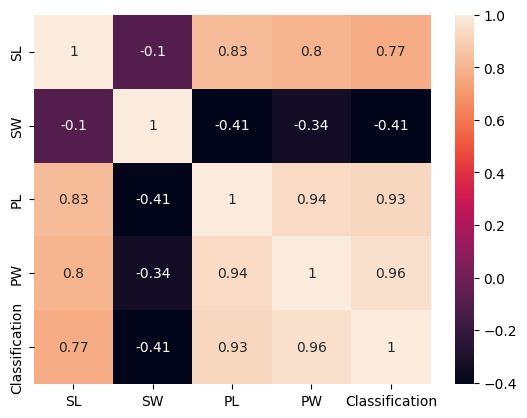

In [17]:
# Find the correlation of this dataset using a heatmap
sns.heatmap(iris_data.corr(),annot=True)

Even though there is a strong correlation between PW-PL and PL-SL, we didn't drop any column due to the limited number of columns.







In [18]:
#Splitting dependent and independent features
y = iris_data['Classification']
X = iris_data.drop('Classification', axis=1)

In [19]:
#splitting to train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)


**Logistic Regression**

In [20]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [21]:
#fitting train sets into LogisticRegression
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
#doing prediction on test set
y_log_pred=log_reg.predict(X_test)

In [23]:
y_log_pred

array([0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 2, 1, 0, 2, 1])

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [25]:
confusion_matrix(y_test,y_log_pred)

array([[8, 2, 0],
       [0, 9, 1],
       [0, 1, 9]])

In [26]:
print('Accuracy:',accuracy_score(y_test,y_log_pred))
print('Precision:',precision_score(y_test,y_log_pred,average='weighted'))
print('recall:',recall_score(y_test,y_log_pred,average='weighted'))
print('F1:',f1_score(y_test,y_log_pred,average='weighted'))

Accuracy: 0.8666666666666667
Precision: 0.8833333333333333
recall: 0.8666666666666667
F1: 0.8690235690235691


Not a good accuracy,So v can scale the model





In [27]:
iris_data.describe()

,SL,SW,PL,PW,Classification
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.855944,3.044889,3.780000,1.198667,1.000000
std,0.808480,0.407197,1.729424,0.763161,0.819232
min,4.300000,2.087500,1.000000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.275000,5.100000,1.800000,2.000000
max,7.900000,3.987500,6.900000,2.500000,2.000000


Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler=StandardScaler()


In [30]:
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.fit_transform(X_test)

In [31]:
log_reg.fit(X_train_scale,y_train)
y_log_pred=log_reg.predict(X_test_scale)

In [32]:
confusion_matrix(y_test,y_log_pred)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

In [33]:
print('Accuracy:',accuracy_score(y_test,y_log_pred))
print('Precision:',precision_score(y_test,y_log_pred,average='weighted'))
print('recall:',recall_score(y_test,y_log_pred,average='weighted'))
print('F1:',f1_score(y_test,y_log_pred,average='weighted'))

Accuracy: 0.9666666666666667
Precision: 0.9696969696969696
recall: 0.9666666666666667
F1: 0.9665831244778613


**KNN**

In [34]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

In [35]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(X_train,y_train)
  y_pred_knn=classifier.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

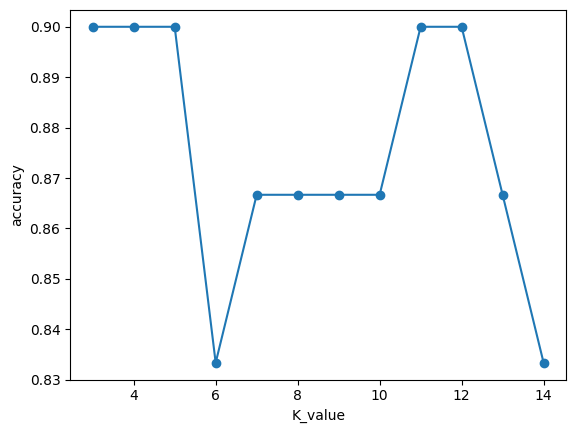

In [36]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('accuracy')

In [37]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred_knn=classifier.predict(X_test)




In [38]:
print('Accuracy:',accuracy_score(y_test,y_pred_knn))
print('Precision:',precision_score(y_test,y_pred_knn,average='weighted'))
print('recall:',recall_score(y_test,y_pred_knn,average='weighted'))
print('F1:',f1_score(y_test,y_pred_knn,average='weighted'))

Accuracy: 0.9
Precision: 0.9230769230769231
recall: 0.9
F1: 0.9019408424442749


 **SVM**

In [83]:
from sklearn.svm import SVC
sv_cl=SVC(kernel='poly')
#fitting train sets into SVM

sv_cl.fit(X_train,y_train)

SVC(kernel='poly')

In [84]:
y_pred=sv_cl.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.9


In [86]:
print(confusion_matrix(y_test,y_pred))


[[ 8  2  0]
 [ 0  9  1]
 [ 0  0 10]]


***Decision Tree***

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()

#fitting train sets into Decision Tree

dt_clf.fit(X_train,y_train)
y_pred=dt_clf.predict(X_test)

In [64]:
print('Accuracy is:',accuracy_score(y_test,y_pred))



Accuracy is: 0.9333333333333333


In [62]:
print(confusion_matrix(y_test,y_pred))


[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]


**Random Forest**

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()

#fitting train sets into Random Forest

rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
y_pred=rf_clf.predict(X_test)

In [58]:
print('Accuracy:',accuracy_score(y_test,y_pred))


Accuracy: 0.9666666666666667


In [59]:
print(confusion_matrix(y_test,y_pred))


[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


Accuracy

LogisticRegression-0.96
KNN-0.9
SVM-0.9  
Decision Tree-0.93
Random Forest-0.96


  **Since Logistic Regression and Random Forest models exhibit higher accuracy, it can be concluded that Logistic Regression and Random Forest are the best models.**





